# Setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.autograd import Variable

from matplotlib import pyplot as plt

# print(os.listdir("../input"))

#Exercise

In [3]:
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [4]:
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7f580b436cf0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
print("Numpy {}\n".format(np.ones((2,3))))
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
print("Numpy {}\n".format(np.random.rand(2,3)))
print(torch.rand(2,3)) #랜덤함수

Numpy [[0.51721818 0.37770907 0.52949441]
 [0.58863758 0.95030907 0.23105886]]

tensor([[0.9787, 0.9839, 0.1349],
        [0.5901, 0.9794, 0.5818]])


In [7]:
arr = np.random.rand(2,2)
print("{} {}\n".format(type(arr),arr))


from_numpy_to_tensor = torch.from_numpy(arr)
print("{}\n".format(from_numpy_to_tensor))


tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.26173517 0.32809599]
 [0.76656731 0.43113577]]

tensor([[0.2617, 0.3281],
        [0.7666, 0.4311]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.26173517 0.32809599]
 [0.76656731 0.43113577]]



### 사칙연산

In [8]:
tensor = torch.ones(3,3)
print("\n",tensor)

print("{}{}".format(tensor.view(9).shape,tensor.view(9)))
print("")
print(f"Addition: {torch.add(tensor,tensor)}")

print(f"Subtraction: {tensor.sub(tensor)}")

print(f"Element wise multiplication: {torch.mul(tensor,tensor)}")

print(f"Element wise division: {torch.div(tensor,tensor)}")

tensor = torch.Tensor([1,2,3,4,5])
print(f"Mean: {tensor.mean()}")

print(f"std: {tensor.std()}")


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])
Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Mean: 3.0
std: 1.5811388492584229


In [9]:
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [10]:
arr = [2,4]
tensor = torch.Tensor(arr)

x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)
o = (1/2)*sum(y)
print(" o =  ",o)
o.backward()  #역전파

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)


In [11]:
print("gradients: ",x.grad)

gradients:  tensor([2., 4.])


# 차량데이터

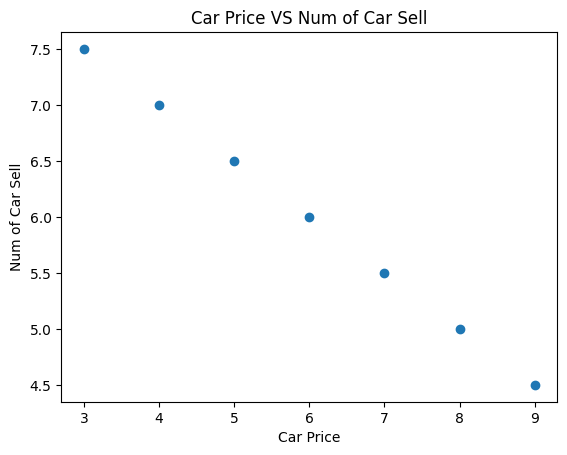

In [12]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price")
plt.ylabel("Num of Car Sell")
plt.title("Car Price VS Num of Car Sell")
plt.show()

## Linear Regression Model

In [13]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)


input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

mse = nn.MSELoss()

In [14]:
# Hyperparam
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate)

## 학습

In [15]:
loss_list = []
iteration_num = 1001
for i in range(iteration_num):
    optimizer.zero_grad()
    results = model(car_price_tensor)
    loss = mse(results, number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(i % 50 == 0):
        print('epoch {}, loss {}'.format(i, loss.data))

epoch 0, loss 102.38390350341797
epoch 50, loss 5.1197099685668945
epoch 100, loss 3.4596025943756104
epoch 150, loss 2.3377978801727295
epoch 200, loss 1.5797488689422607
epoch 250, loss 1.067503571510315
epoch 300, loss 0.7213566899299622
epoch 350, loss 0.4874507784843445
epoch 400, loss 0.3293907046318054
epoch 450, loss 0.2225833237171173
epoch 500, loss 0.15040862560272217
epoch 550, loss 0.1016373559832573
epoch 600, loss 0.06868074834346771
epoch 650, loss 0.04641076549887657
epoch 700, loss 0.031362082809209824
epoch 750, loss 0.021192824468016624
epoch 800, loss 0.014320935122668743
epoch 850, loss 0.009677340276539326
epoch 900, loss 0.006539496593177319
epoch 950, loss 0.0044188909232616425
epoch 1000, loss 0.002985954750329256


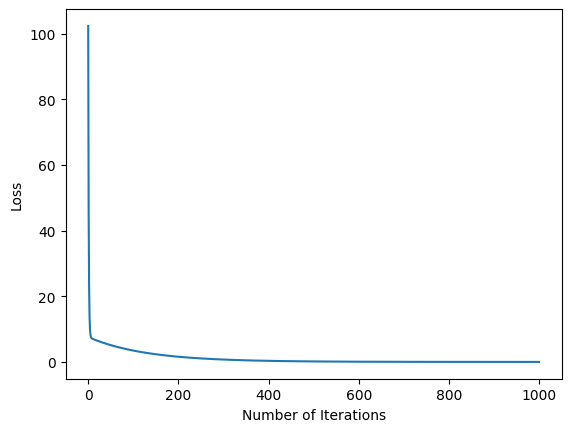

In [16]:
plt.plot(range(iteration_num),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

## Output Analysis

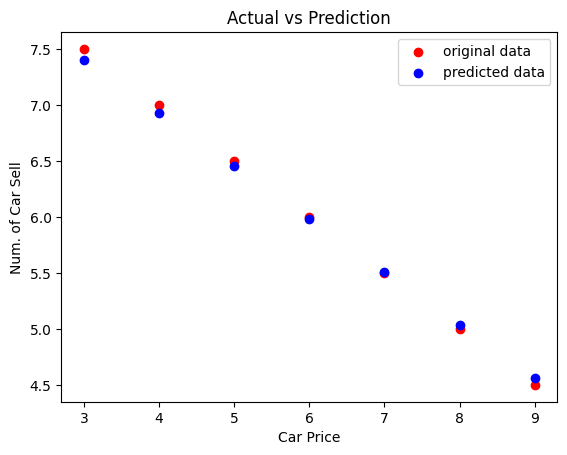

In [17]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

plt.legend()
plt.xlabel("Car Price")
plt.ylabel("Num. of Car Sell")
plt.title("Actual vs Prediction")
plt.show()

#MNIST

주어진 데이터가 MNIST라서 dataset import로 대체

In [18]:
train_data = datasets.MNIST(root = './data/02/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = './data/02/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 37459544.15it/s]


Extracting ./data/02/MNIST/raw/train-images-idx3-ubyte.gz to ./data/02/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1100333.31it/s]

Extracting ./data/02/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/02/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 6998133.46it/s]


Extracting ./data/02/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/02/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4769786.87it/s]

Extracting ./data/02/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/02/MNIST/raw

number of training data :  60000
number of test data :  10000


In [19]:
batch_size = 50
num_epochs = 15

In [20]:
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size = batch_size, shuffle = True)
first_batch = train_loader.__iter__().__next__()

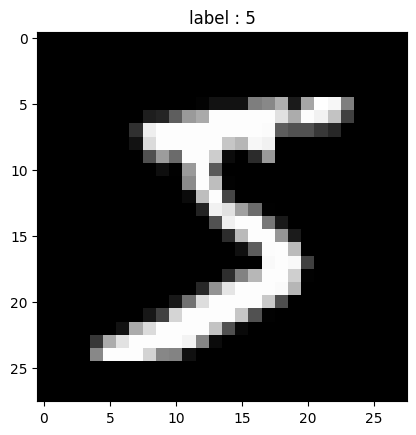

In [21]:
image, label = train_data[0]
plt.imshow(image.squeeze().numpy(), cmap='gray')
plt.title('label : %s' % label)
plt.show()

## Model

In [22]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        o = self.linear(x)
        return o

In [23]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()

In [24]:
# Hyperparam
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 학습

In [25]:
cnt = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()

        # parameter update
        optimizer.step()
        cnt += 1

        if cnt % 50 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)

                pred = torch.max(outputs.data, 1)[1]

                total += len(labels)
                correct += (pred == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(cnt)
        if cnt % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(cnt, loss.data, accuracy))

Iteration: 500  Loss: 1.7804381847381592  Accuracy: 67.45999908447266%
Iteration: 1000  Loss: 1.5690748691558838  Accuracy: 74.7699966430664%
Iteration: 1500  Loss: 1.244229793548584  Accuracy: 78.51000213623047%
Iteration: 2000  Loss: 1.2661385536193848  Accuracy: 80.63999938964844%
Iteration: 2500  Loss: 0.9689146280288696  Accuracy: 81.75%
Iteration: 3000  Loss: 1.1457146406173706  Accuracy: 82.81999969482422%
Iteration: 3500  Loss: 0.8835573792457581  Accuracy: 83.36000061035156%
Iteration: 4000  Loss: 0.9625759720802307  Accuracy: 84.05000305175781%
Iteration: 4500  Loss: 0.7304791808128357  Accuracy: 84.37999725341797%
Iteration: 5000  Loss: 0.7581530809402466  Accuracy: 84.75%
Iteration: 5500  Loss: 0.8337022662162781  Accuracy: 85.18000030517578%
Iteration: 6000  Loss: 0.8417930603027344  Accuracy: 85.51000213623047%
Iteration: 6500  Loss: 0.7148962616920471  Accuracy: 85.83000183105469%
Iteration: 7000  Loss: 0.8148950338363647  Accuracy: 85.95999908447266%
Iteration: 7500  Lo

## Loss Analysis

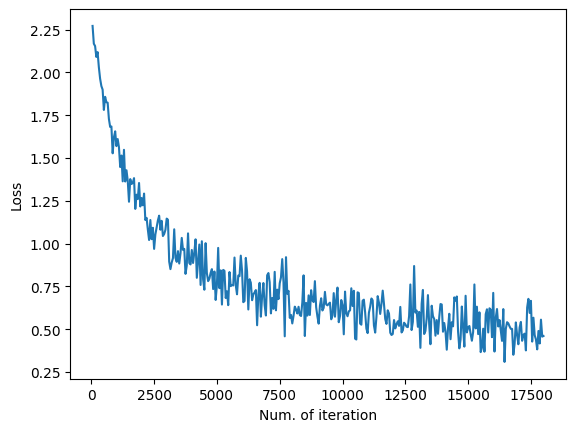

In [26]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Num. of iteration")
plt.ylabel("Loss")
plt.show()

## ANN model

In [27]:
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.elu3(out)
        out = self.fc4(out)
        return out

In [28]:
input_dim = 28*28
hidden_dim = 150
output_dim = 10

In [29]:
model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()

In [30]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
## 학습

In [34]:
cnt = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad()

        #FP
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()
        cnt += 1

        if cnt % 50 == 0:
            correct = 0
            total = 0

            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]
                total += len(labels)
                correct += (predicted == labels).sum()

        accuracy = 100 * correct / float(total)
        loss_list.append(loss.data)
        iteration_list.append(cnt)
        accuracy_list.append(accuracy)
        if cnt % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(cnt, loss.data, accuracy))

Iteration: 500  Loss: 0.6031522750854492  Accuracy: 79.94999694824219 %
Iteration: 1000  Loss: 0.5951650738716125  Accuracy: 87.94000244140625 %
Iteration: 1500  Loss: 0.5331389904022217  Accuracy: 89.77999877929688 %
Iteration: 2000  Loss: 0.2136065810918808  Accuracy: 91.52999877929688 %
Iteration: 2500  Loss: 0.5415712594985962  Accuracy: 92.22000122070312 %
Iteration: 3000  Loss: 0.29656314849853516  Accuracy: 93.08999633789062 %
Iteration: 3500  Loss: 0.23230232298374176  Accuracy: 93.69999694824219 %
Iteration: 4000  Loss: 0.19282758235931396  Accuracy: 94.11000061035156 %
Iteration: 4500  Loss: 0.290188193321228  Accuracy: 94.58999633789062 %
Iteration: 5000  Loss: 0.11438819766044617  Accuracy: 94.9800033569336 %
Iteration: 5500  Loss: 0.11398663371801376  Accuracy: 95.05000305175781 %
Iteration: 6000  Loss: 0.19660815596580505  Accuracy: 95.55999755859375 %
Iteration: 6500  Loss: 0.17565971612930298  Accuracy: 95.58999633789062 %
Iteration: 7000  Loss: 0.1919332891702652  Accu

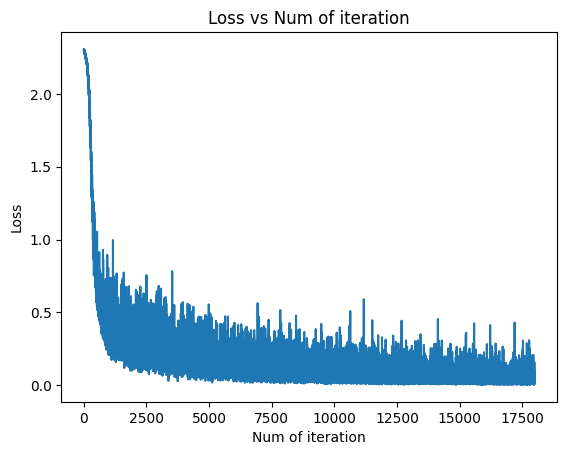

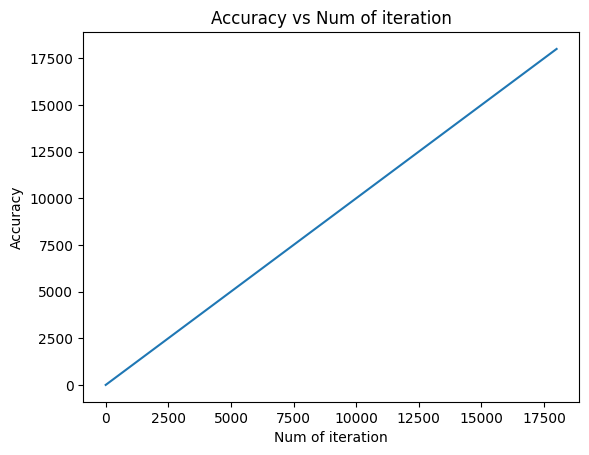

In [35]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Num of iteration")
plt.ylabel("Loss")
plt.title("Loss vs Num of iteration")
plt.show()

plt.plot(iteration_list)
plt.xlabel("Num of iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Num of iteration")
plt.show()